<a href="https://colab.research.google.com/github/3B032007/2025_ML_hws/blob/main/hw5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1、下載IMDB

In [ ]:
import urllib.request
import os
import tarfile

In [ ]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

downloaded: ('data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x79833bb66c90>)


# 2、解壓縮IMDb

In [ ]:
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open("data/aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('data/')

# 3、匯入文字資料預處理模組

In [ ]:
# from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

# 4、定義rm_tags(text)函數

In [ ]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

# 5、定義 read_files(filetype)函數

In [ ]:
import os
def read_files(filetype):
    path = "data/aclImdb/"
    file_list=[]

    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]

    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]

    print('read',filetype, 'files:',len(file_list))

    all_labels = ([1] * 12500 + [0] * 12500)

    all_texts  = []
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]

    return all_labels,all_texts

# 6、建立訓練與測試資料

In [ ]:
y_train,train_text=read_files("train")

read train files: 25000


In [ ]:
y_test,test_text=read_files("test")

read test files: 25000


# 7、利用tokenizer建立字典

In [ ]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train_text)

In [ ]:
print(tokenizer.document_count)

25000


# 8、轉換每篇影評(文字串)為一連串的數字(數字串)

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq  = tokenizer.texts_to_sequences(test_text)

In [ ]:
print(train_text[0])

Farrah Fawcett has spent the better part of her post-Angel's career confounding us, with an occasional noteworthy acting performance sandwiched in between her Playboy frolics and Letterman escapades. But when it comes down to it, there's no denying that this girl can act. Far from a story of epic proportions, this well-done TV-movie is gentle, quiet and occasionally moving. Fawcett plays the wayward black sheep daughter come home only to find that she missed the last days of her mom's life as well as the funeral, much to the chagrin of her more stable and presumably more sensible sister. Brad Johnson plays the love interest, and a story unfolds with all the typical elements of telefilm drama- but then there's always that confounding Farrah to watch, and she does, indeed, remain eminently watchable. (And, yes, I admit it, I did have that Farrah poster on my wall way back when). Silk Hope gets three and a half stars (out of five) on the Corkymeter. Bosley would be proud.


# 9、完成x_train與x_test的建立：使每篇影評的數字串長度相同

In [ ]:
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

In [ ]:
print('before pad_sequences length=',len(x_train_seq[0]))
print(x_train_seq[0])

before pad_sequences length= 133
[43, 1081, 1, 124, 169, 4, 37, 1202, 607, 174, 15, 31, 112, 235, 7, 196, 37, 2, 17, 50, 8, 262, 176, 5, 8, 221, 53, 11, 10, 246, 66, 507, 226, 35, 3, 61, 4, 1705, 10, 69, 220, 244, 16, 6, 1851, 2, 723, 294, 1, 325, 573, 212, 340, 60, 5, 165, 11, 55, 1044, 1, 232, 499, 4, 37, 109, 13, 69, 13, 1, 72, 5, 1, 4, 37, 49, 2, 49, 792, 294, 1, 115, 598, 2, 3, 61, 15, 28, 1, 795, 785, 4, 449, 17, 91, 221, 206, 11, 5, 102, 2, 55, 123, 845, 1746, 2, 418, 9, 969, 8, 9, 118, 24, 11, 19, 57, 1506, 92, 141, 50, 436, 210, 285, 2, 3, 316, 379, 42, 4, 672, 19, 1, 58, 25]


# 10、轉換x_train, x_test, y_train, y_test為numpy array

In [ ]:
import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(25000, 100)
(25000, 100)
(25000,)


# 11、讀入神經網路套件

In [26]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# 12、建立模型

In [27]:
model=Sequential()
model.add(Embedding(input_dim=2000, output_dim=32, input_length=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# 13、組裝

In [28]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
model.build(input_shape=(None, 100))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,561 (572.50 KB)

 Trainable params: 146,561 (572.50 KB)

 Non-trainable params: 0 (0.00 B)

# 14、訓練

In [32]:
train_history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.8615 - loss: 0.3306 - val_accuracy: 0.7908 - val_loss: 0.4685
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.8828 - loss: 0.2952 - val_accuracy: 0.7276 - val_loss: 0.5472
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 134ms/step - accuracy: 0.8906 - loss: 0.2649 - val_accuracy: 0.7574 - val_loss: 0.5910
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 137ms/step - accuracy: 0.9003 - loss: 0.2450 - val_accuracy: 0.7210 - val_loss: 0.6391
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9127 - loss: 0.2226 - val_accuracy: 0.7526 - val_loss: 0.5662
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 133ms/step - accuracy: 0.9161 - loss: 0.2098 - val_accuracy: 0.7498 - val_loss: 0.6379
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.9281 - loss: 0.1833 - val_accuracy: 0.7600 - val_loss: 0.6967
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 124ms/step - accuracy: 0.9395 - los

# 15、以圖型顯示準確率(accuracy)與損失(loss)

In [33]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

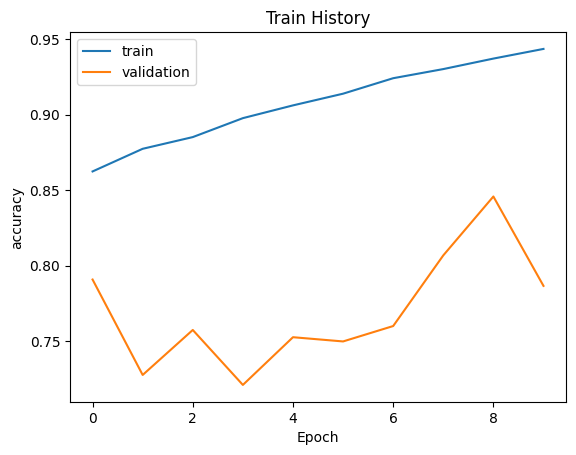

In [34]:
show_train_history(train_history,'accuracy','val_accuracy')

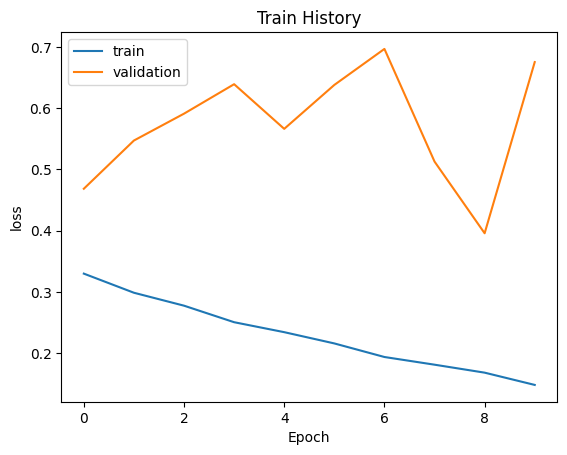

In [35]:
show_train_history(train_history,'loss','val_loss')

In [36]:
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8671 - loss: 0.3979

accuracy= 0.8352000117301941


# 16、儲存模型與權重

In [37]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks'
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model.weights.h5')

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# 17、儲存Tokenizer

In [38]:
import pickle
f = open('imdb_tokenizer.pkl', 'wb')
pickle.dump(tokenizer, f)
f.close()